In [249]:
# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
import numpy as np
import random

### Running simulations

In [279]:
# generate an item bank
bank_size = 50
items = generate_item_bank(bank_size, '1PL')
examinees = 1

print('Starting simulation ...')
# simulate 10 examinees taking a CAT, given the generated item bank,
# a random proficiency initializer, maximum information item selector,
# hill climbing proficiency estimator and stopping criterion of 10 items
s = Simulator(items, examinees)
s.simulate(RandomInitializer(), MaxInfoSelector(), HillClimbingEstimator(), MaxItemStopper(10), verbose=True)

Starting simulation ...

Starting simulation: Random Initializer Maximum Information Selector Hill Climbing Estimator Maximum Item Number Initializer 50 items


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.85it/s]


Simulation took 0.05601620674133301 seconds


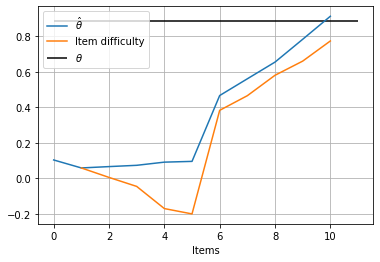

Bias: 0.028729002324464847
Mean squared error: 0.0008253555745591066
Root mean squared error: 0.028729002324464847
Accessing examinee 0 results...
    True proficiency: 0.8846547560969491
    Items administered: [7, 44, 5, 15, 39, 32, 11, 27, 9, 16]
    Responses: [True, True, False, True, True, True, False, False, True, True]
    Proficiency estimation during each step of the test: [0.10405704997609888, 0.059098110506922805, 0.0667081821845214, 0.07393961583624586, 0.09177439251617098, 0.09607369702879137, 0.4668632386112493, 0.5611822748789843, 0.6552596366346641, 0.7836396821478058, 0.913383758421414]


In [280]:
for i in range(examinees):
    examinee_index = i

    catplot.test_progress(simulator=s,index=examinee_index)
    print('Bias:', s.bias)
    print('Mean squared error:', s.mse)
    print('Root mean squared error:', s.rmse)

    print('Accessing examinee', examinee_index, 'results...')
    print('    True proficiency:', s.examinees[examinee_index])
    print('    Items administered:', s.administered_items[examinee_index])
    print('    Responses:', s.response_vectors[examinee_index])
    print('    Proficiency estimation during each step of the test:', s.estimations[examinee_index])

### Import data bank

Generating item bank...



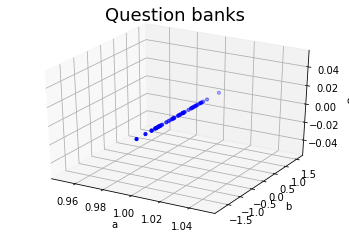

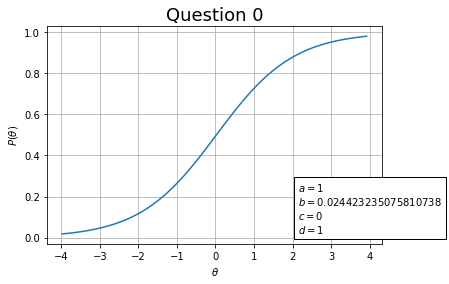

In [250]:
# generating an item bank
print('Generating item bank...')
bank_size = 50
items = generate_item_bank(bank_size, '1PL')

catplot.gen3d_dataset_scatter(items, 'Question banks', show = True)

catplot.item_curve(b = items[0][1], title = 'Question 0')

### Initialize

In [272]:
# creating dummy response patterns and selecting item indexes to pass as administered items
#print('Creating dummy examinee data...')
#responses = [random.choice([True, False])]
#administered_items = [random.randint(0, bank_size - 1)]
responses = []
administered_items = []

print('Creating simulation components...')
# create a random proficiency initializer
initializer = RandomInitializer()

# create a maximum information item selector
selector = MaxInfoSelector()

# create a hill climbing proficiency estimator
estimator = HillClimbingEstimator()

# create a stopping criterion that will make tests stop after 10 items
stopper = MaxItemStopper(10)

# manually initialize an examinee's proficiency as a float variable
est_theta = initializer.initialize()
thetas = [est_theta]
print('Examinee initial proficiency:', est_theta)

# get an estimated theta, given the answers to the dummy items
#new_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
#print('Estimated proficiency, given answered items:', new_theta)
#thetas.append(new_theta)

# get the index of the next item to be administered to the current examinee, given the answers they have already given to the previous dummy items
#item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)
#print('Next item to be administered:', item_index)

Creating simulation components...
Examinee initial proficiency: -3.87339859115867


In [273]:
def item_selection():
    # get the index of the next item to be administered to the current examinee, given the answers they have already given to the previous dummy items
    item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)
    print('Next item to be administered:', item_index)

    # get a boolean value pointing out whether the test should stop
    _stop = stopper.stop(administered_items=items[administered_items], theta=est_theta)
    print('Should the test be stopped:', _stop)
    
    return (_stop, item_index)

In [274]:
def item_administration():
    # get an new estimated theta
    new_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
    print('Estimated proficiency, given answered items:', new_theta)
    thetas.append(new_theta)

In [275]:
while True:
    administered_items.append(item_index)
    
    response = bool(int(input())) # Get user respone for current question
    responses.append(response)
    
    item_administration()
    
    (_stop, item_index) = item_selection() # Get next item
    
    if _stop:
        break

0
Estimated proficiency, given answered items: 0.5397614082193325
Next item to be administered: 9
Should the test be stopped: False
0
Estimated proficiency, given answered items: -2.1302421395528053
Next item to be administered: 33
Should the test be stopped: False
0
Estimated proficiency, given answered items: -2.1302421395528053
Next item to be administered: 13
Should the test be stopped: False
0
Estimated proficiency, given answered items: -2.1302421395528053
Next item to be administered: 8
Should the test be stopped: False
1
Estimated proficiency, given answered items: -2.1302421395528053
Next item to be administered: 17
Should the test be stopped: False
1
Estimated proficiency, given answered items: -1.8365739282046278
Next item to be administered: 36
Should the test be stopped: False
1
Estimated proficiency, given answered items: -1.3909513257305826
Next item to be administered: 40
Should the test be stopped: False
1
Estimated proficiency, given answered items: -1.072295492433067

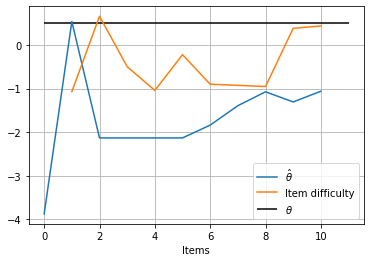

In [282]:
administered_items_matrix = []

for idx in administered_items:
    administered_items_matrix.append(items[idx])
    
administered_items_matrix = np.asarray(administered_items_matrix)

catplot.test_progress(thetas = thetas, administered_items = administered_items_matrix, true_theta = 0.5)